In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve


In [171]:
os.chdir('D:/Great Lakes BA Cert/MACHINE LEARNING/Project')

In [172]:
data_df = pd.read_excel("Election_Data 1.xlsx")

In [173]:
data_df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [174]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [175]:
data_df1=data_df.drop('Unnamed: 0',axis=1)

In [384]:
data_df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0


In [385]:
data_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.258033,0.852938,1.5,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.161639,0.885286,1.5,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525.0,0.467541,0.499109,0.0,0.0,0.0,1.0,1.0


In [176]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [177]:
data_df1.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [178]:
dups=data_df1.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df1[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [179]:
data_df1.shape

(1525, 9)

In [180]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data_df1['vote']= label_encoder.fit_transform(data_df1['vote'])
data_df1['gender']= label_encoder.fit_transform(data_df1['gender'])

In [392]:
data_df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0


In [181]:
data_df1.dtypes

vote                       int32
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                     int32
dtype: object

skewness of Unnamed: 0 : -0.8576041066179676
skewness of vote : 0.14447848346551462
skewness of age : -0.2402163142518291
skewness of economic.cond.national : -0.14940490939119963
skewness of economic.cond.household : -0.5348918666133158
skewness of Blair : 0.15194998016716968
skewness of Hague : -0.13581295528712456
skewness of Europe : -0.4264178682034399
skewness of political.knowledge : 0.13011052074203272


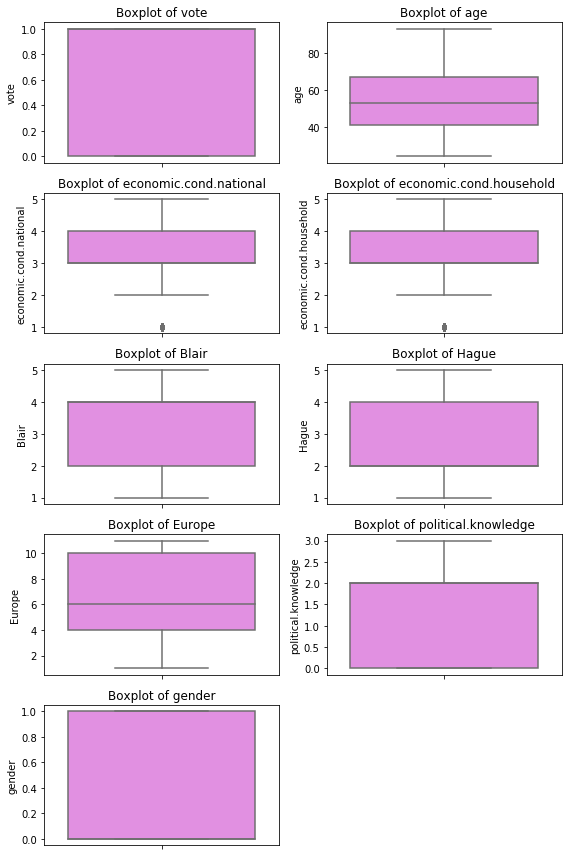

In [182]:
from scipy.stats import skew
plt.figure(figsize = (8,12))
feature_list = data_df1.columns
for i in range(len(feature_list)):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y = data_df1[feature_list[i]], data = data_df1,color="violet")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    l=skew(data_df1[feature_list[i]])
    print("skewness of",data_df.columns[i],":",l)

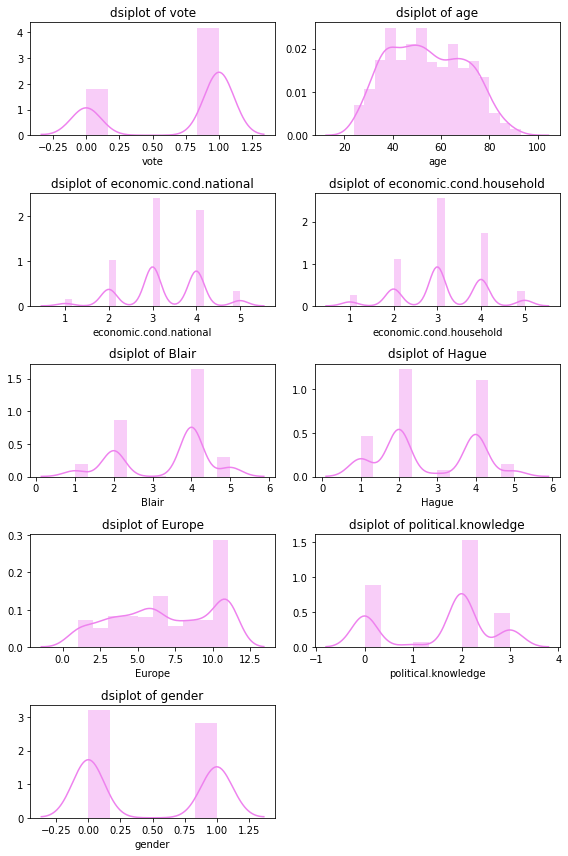

In [183]:
plt.figure(figsize = (8,12))
feature_list = data_df1.columns
for i in range(len(feature_list)):
    plt.subplot(5, 2, i + 1)
    sns.distplot(data_df1[feature_list[i]], color="violet")
    plt.title('dsiplot of {}'.format(feature_list[i]))
    plt.tight_layout()

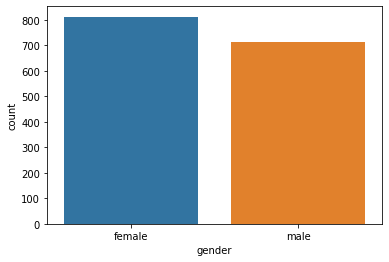

In [184]:
sns.countplot(data_df.gender)

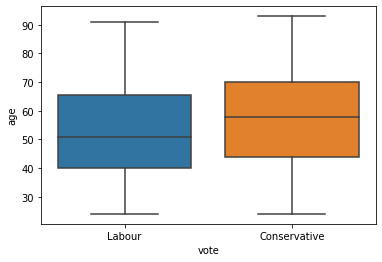

In [185]:
sns.boxplot(x='vote',y='age',data=data_df)

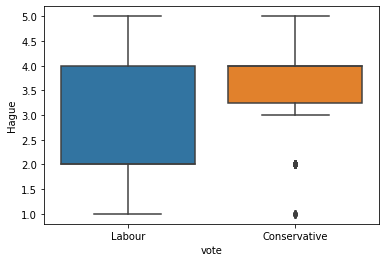

In [186]:
sns.boxplot(x='vote',y='Hague',data=data_df)

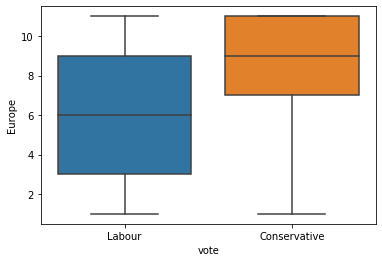

In [187]:
sns.boxplot(x='vote',y='Europe',data=data_df)

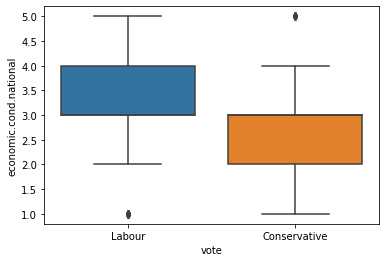

In [188]:
sns.boxplot(x='vote',y='economic.cond.national',data=data_df)

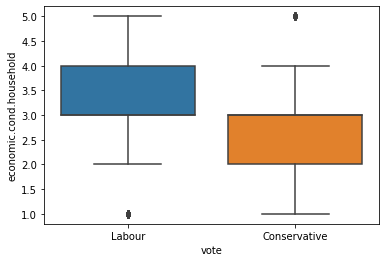

In [189]:
sns.boxplot(x='vote',y='economic.cond.household',data=data_df)

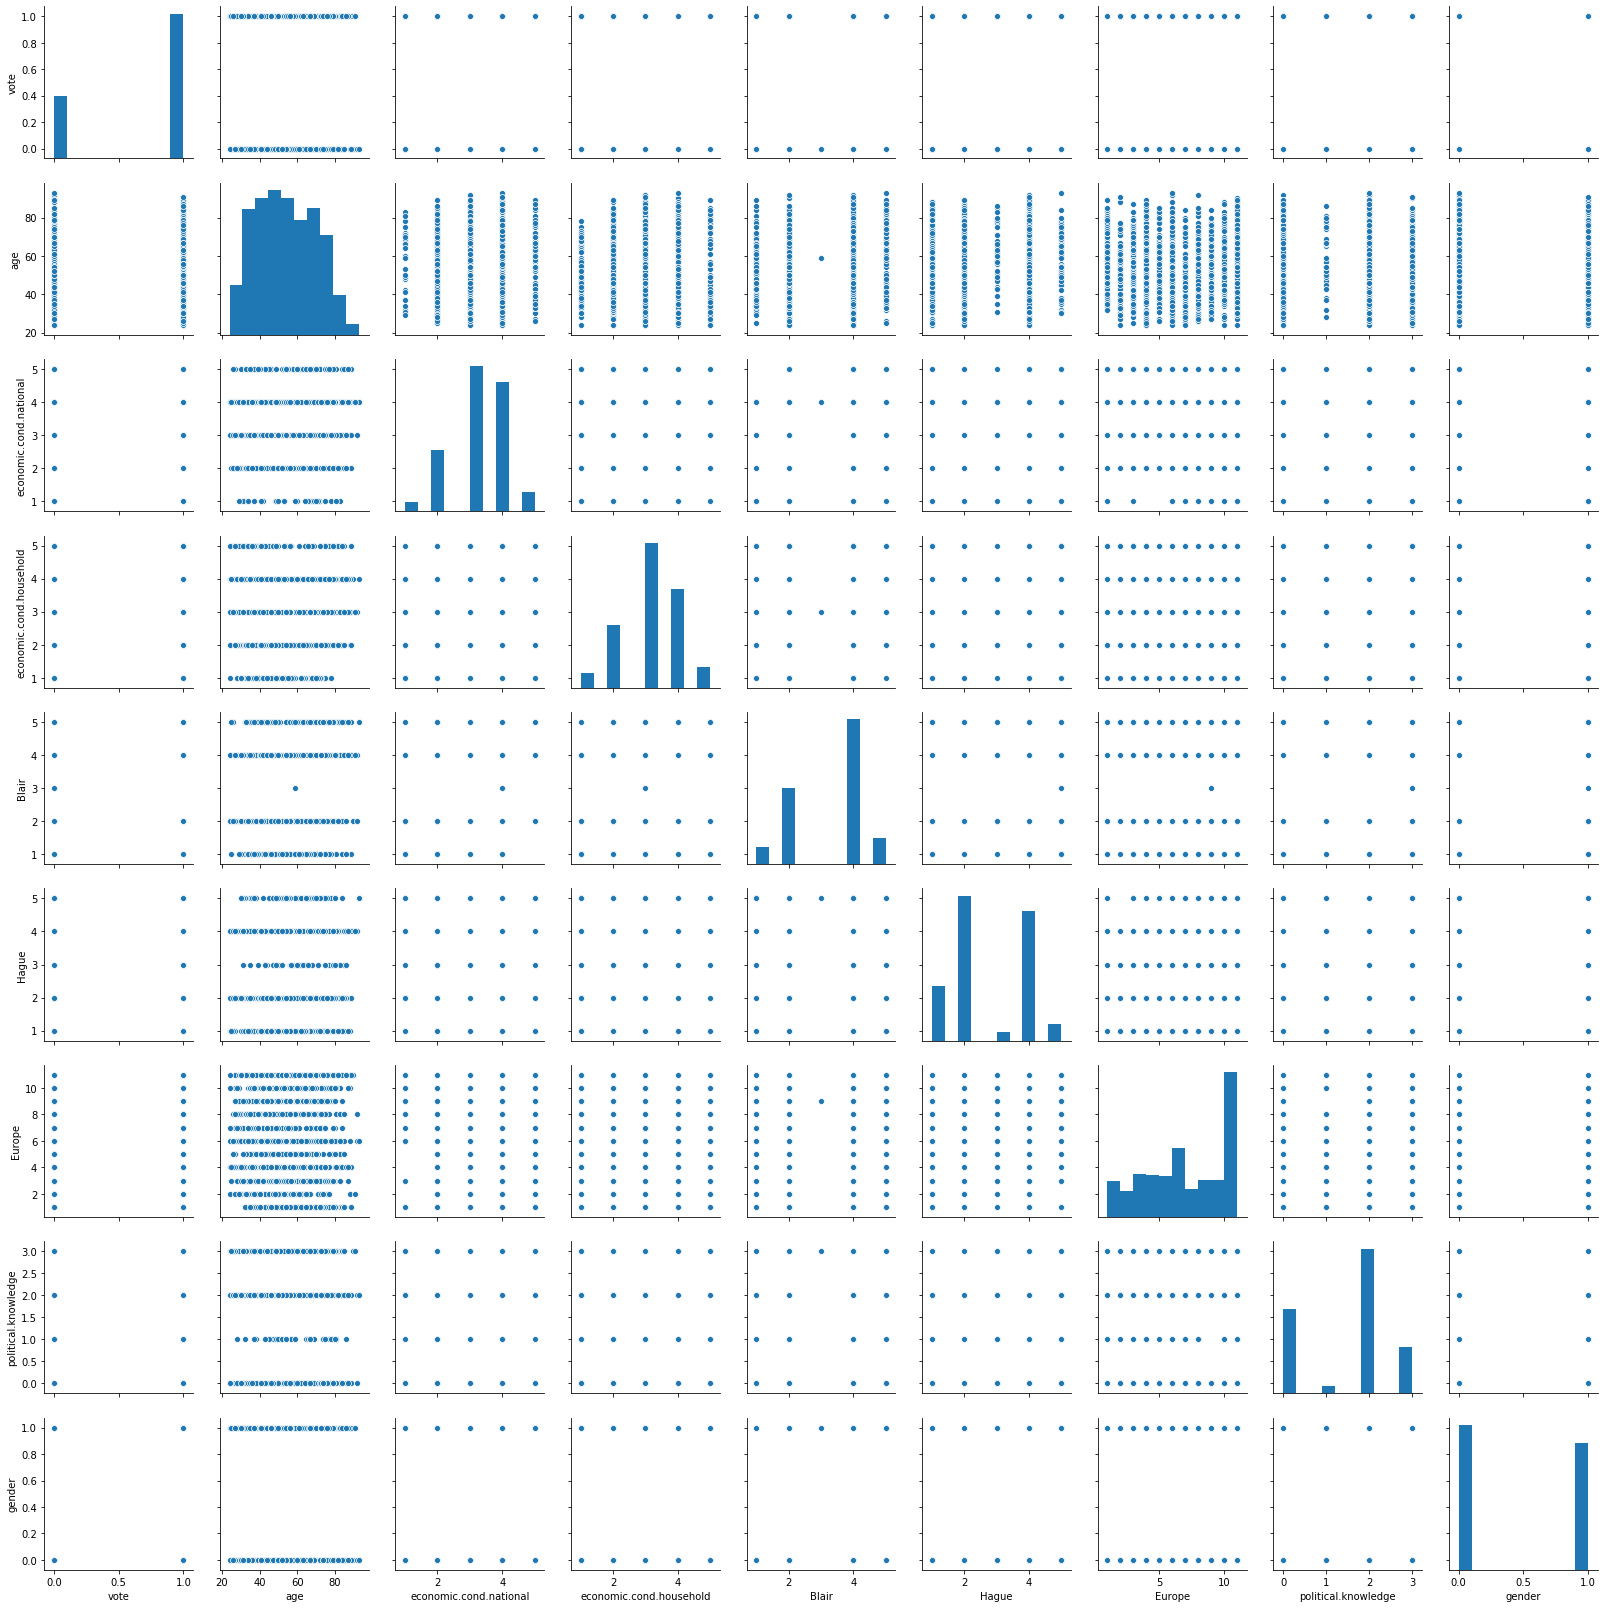

In [190]:
sns.pairplot(data_df1)

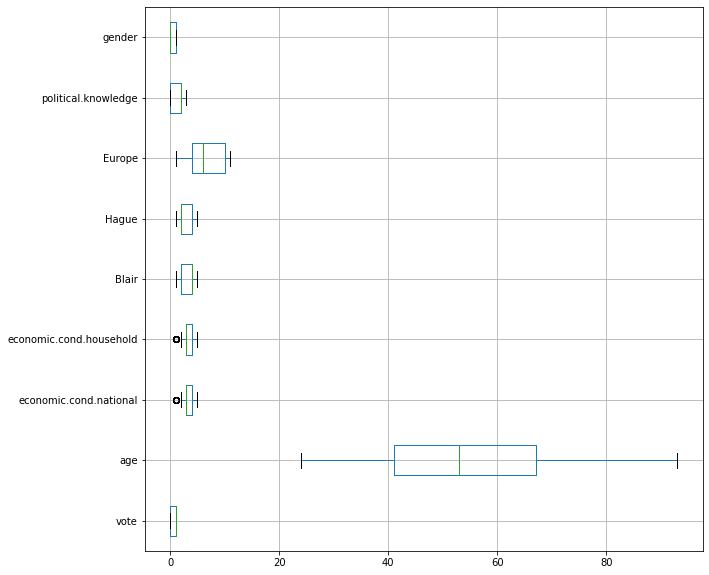

In [191]:
plt.figure(figsize=(10,10))
data_df1.iloc[:,:9].boxplot(vert=0)
plt.show()

In [193]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [194]:
for column in data_df1.iloc[:, 1:9].columns:
    lr,ur=remove_outlier( data_df1[column])
    data_df1[column]=np.where( data_df1[column]>ur,ur, data_df1[column])
    data_df1[column]=np.where( data_df1[column]<lr,lr, data_df1[column])

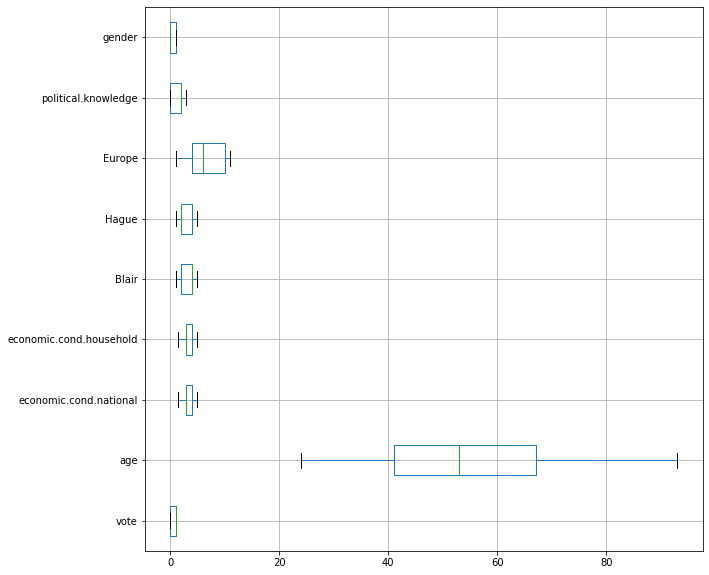

In [195]:
plt.figure(figsize=(10,10))
data_df1.iloc[:, 0:9].boxplot(vert=0)

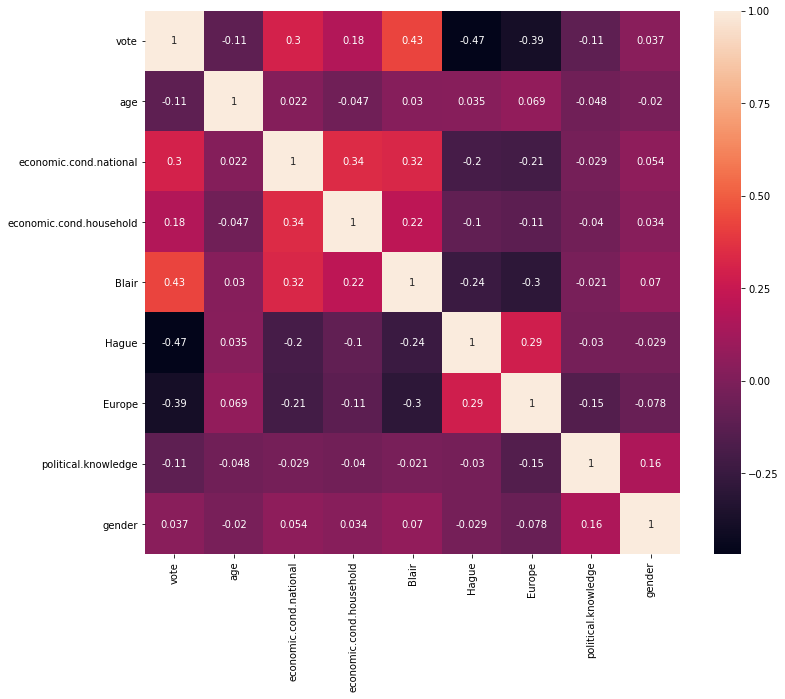

In [388]:
plt.figure(figsize = (12,10))
sns.heatmap(data_df1.corr(), annot=True);

In [197]:
data_df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [236]:
# Copy all the predictor variables into X dataframe
x = data_df1.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = data_df1['vote']

In [237]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0


In [393]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [394]:
from scipy.stats import zscore
x  = x.apply(zscore)

In [395]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

# Predictive Modeling - Linear Discriminant Analysis

In [241]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

# Linear Discriminant Analysis - Train data

In [242]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



# Linear Discriminant Analysis - ROC & AUC(Train Data)

the auc 0.889 


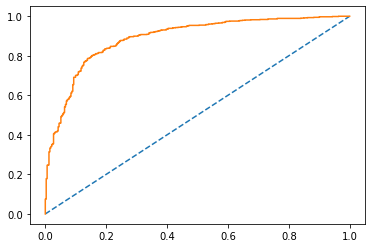

In [243]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

# Linear Discriminant Analysis - Test data

In [244]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



# Linear Discriminant Analysis - ROC & AUC(Test Data)

the auc curve 0.884 


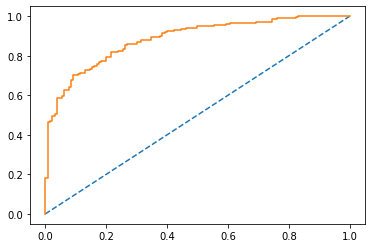

In [245]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# Logistic Regression Model

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# Logistic Regression Model - Train data

In [248]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [249]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.618157,0.381843
1,0.188700,0.811300
2,0.184191,0.815809
3,0.170954,0.829046
4,0.050746,0.949254


In [250]:
Logistic_model.score(X_train,Y_train)

0.8406747891283973

# Logistic Regression Model - ROC & AUC(Test Data)

AUC: 0.890


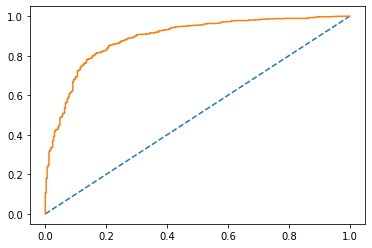

In [251]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Logistic Regression Model - Test data

In [252]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [253]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


# Logistic Regression Model - ROC & AUC(Test Data)

AUC: 0.883


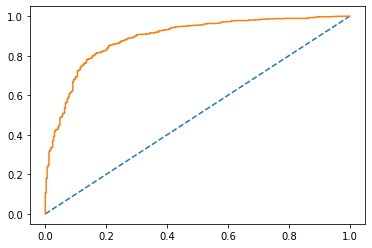

In [254]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# KNN MODEL

In [293]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [294]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [295]:
print(KNN_model_score)

0.8696412948381452


# KNN MODEL- Train Data

In [296]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[264  87]
 [ 62 730]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.84      0.84      1143
weighted avg       0.87      0.87      0.87      1143



# KNN MODEL AUC & ROC(Train Data)

the auc 0.931 


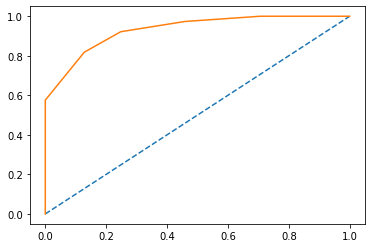

In [297]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

Confusion Matrix


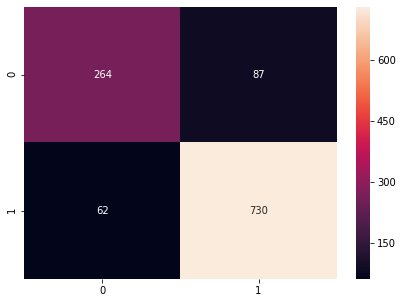

In [322]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train,y_train_predict)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True,fmt='d')

# KNN MODEL - Test data

In [298]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)


0.824607329842932


In [299]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 80  31]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       111
           1       0.88      0.87      0.88       271

    accuracy                           0.82       382
   macro avg       0.79      0.79      0.79       382
weighted avg       0.83      0.82      0.83       382



# KNN MODEL - ROC & AUC(Test Data)

the auc curve 0.870 


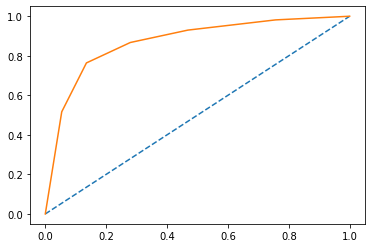

In [300]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Confusion Matrix


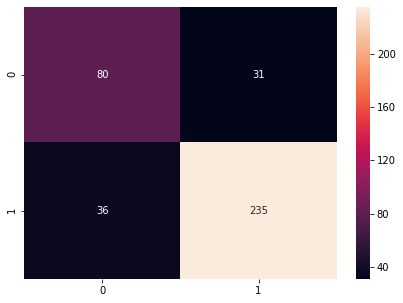

In [324]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,y_test_predict)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True,fmt='d')

# Naïve Bayes Model

In [325]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [328]:
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

# Naïve Bayes Model Train Data

In [330]:
y_train_predict=NB_model.predict(x_train)
model_score=NB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.8320209973753281
[[253  98]
 [ 94 698]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       351
           1       0.88      0.88      0.88       792

    accuracy                           0.83      1143
   macro avg       0.80      0.80      0.80      1143
weighted avg       0.83      0.83      0.83      1143



# Naïve Bayes Model Train Data - ROC & AUC(Train Data)

the auc 0.887 


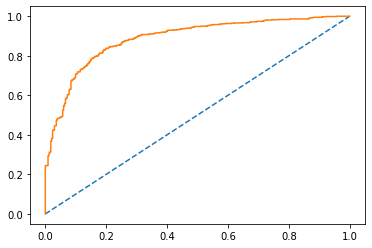

In [331]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#  Naïve Bayes Model Train Data - Test data

In [332]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



#  Naïve Bayes Model Train Data - ROC & AUC(Test Data)

the auc curve 0.885 


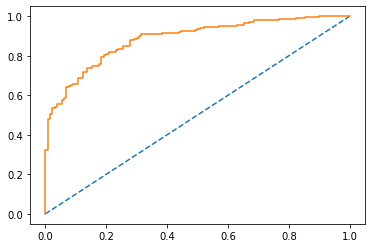

In [333]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# Bagging (Random Forest Classifier)

In [336]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [338]:
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)

#  Bagging (Random Forest Classifier) - Train data

In [339]:
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [340]:
y_train_predict=Bagging_model.predict(x_train)
Bagging_model_score=Bagging_model.score(x_train,y_train)
print(Bagging_model_score)

0.9676290463692039


In [341]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[324  27]
 [ 10 782]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       351
           1       0.97      0.99      0.98       792

    accuracy                           0.97      1143
   macro avg       0.97      0.96      0.96      1143
weighted avg       0.97      0.97      0.97      1143



#  Bagging (Random Forest Classifier) - ROC & AUC(Train Data)

AUC: 0.997


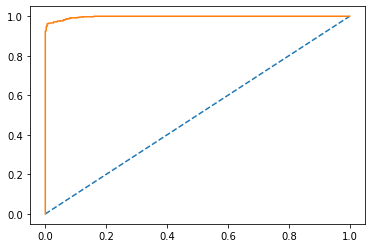

In [342]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#  Bagging (Random Forest Classifier) - Test data

In [344]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.851528384279476
[[ 96  34]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       130
           1       0.90      0.90      0.90       328

    accuracy                           0.85       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



#  Bagging (Random Forest Classifier) - ROC & AUC(Test Data)

AUC: 0.919


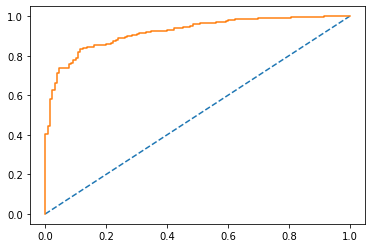

In [345]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

#  Boosting (ADA Boost)

In [346]:
from sklearn.ensemble import AdaBoostClassifier

In [347]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

#  Boosting (ADA Boosting) - Train data

In [348]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



#  Boosting (Random Forest Classifier) - ROC & AUC(Train Data)

AUC: 0.913


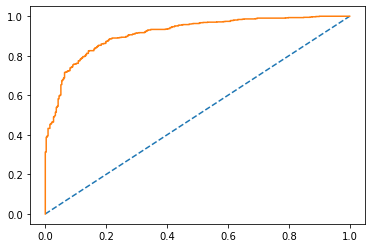

In [349]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#  Boosting (ADA Boosting) - Test data

In [350]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



#  Boosting (ADA Boosting) - ROC & AUC(Test Data)

AUC: 0.879


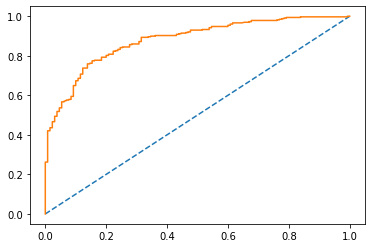

In [351]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

#  Boosting (Gradient Boosting)

In [352]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

#  Boosting (Gradient Boosting) - Train data

In [355]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



#  Boosting (Gradient Boosting) - ROC & AUC(Train Data)

AUC: 0.950


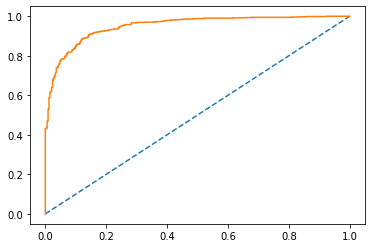

In [356]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#  Boosting (Gradient Boosting) - Test data

In [357]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



#  Boosting (Gradient Boosting) - ROC & AUC(Test Data)

AUC: 0.904


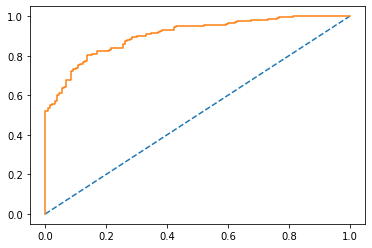

In [358]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)